# Billionaire EDA:

First we are going to install and download the packages needed for the EDA. We will also import the CSV file that has been cleaned and double check that there are no missing entries. 

In [1]:
#%pip install pandasql

In [44]:
# Importing the necessary libraries:
import numpy as np 
import pandas as pd 
import random
from pandasql import sqldf
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

In [33]:
# Read the file billionaries
df = pd.read_csv("billionaires.csv")

In [34]:
# Checking missing 
missing_values_count = df.isnull().sum()
total_missing_values = missing_values_count.sum()
total_missing_values

0

In [35]:
print("Length of Data:", len(df))

Length of Data: 2631


## Visualizing the Data:

In [36]:
#Viewing the first rows:
df.head()

,rank,finalWorth,category,personName,country,city,source,industries,countryOfCitizenship,selfMade,...,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country,Age as of 1 Jan 2023
0,1,211000,Fashion & Retail,Bernard Arnault & family,France,Paris,LVMH,Fashion & Retail,France,False,...,2.782910e+12,65.6,102.5,82.5,24.2,60.7,67059887.0,46.227638,2.213749,74
1,2,180000,Automotive,Elon Musk,United States,"Washington, D.C.","Tesla, SpaceX",Automotive,United States,True,...,2.546270e+13,88.0,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891,52
2,3,114000,Technology,Jeff Bezos,United States,"Washington, D.C.",Amazon,Technology,United States,True,...,2.546270e+13,88.0,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891,59
3,4,107000,Technology,Larry Ellison,United States,"Washington, D.C.",Oracle,Technology,United States,True,...,2.546270e+13,88.0,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891,79
4,5,106000,Finance & Investments,Warren Buffett,United States,"Washington, D.C.",Berkshire Hathaway,Finance & Investments,United States,True,...,2.546270e+13,88.0,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891,93


In [37]:
columns = df.columns
columns

Index(['rank', 'finalWorth', 'category', 'personName', 'country', 'city',
       'source', 'industries', 'countryOfCitizenship', 'selfMade', 'status',
       'gender', 'birthDate', 'lastName', 'firstName', 'date', 'cpi_country',
       'gdp_country', 'gross_tertiary_education_enrollment',
       'gross_primary_education_enrollment_country', 'life_expectancy_country',
       'tax_revenue_country_country', 'total_tax_rate_country',
       'population_country', 'latitude_country', 'longitude_country',
       'Age as of 1 Jan 2023'],
      dtype='object')

## Correlation Matrix:

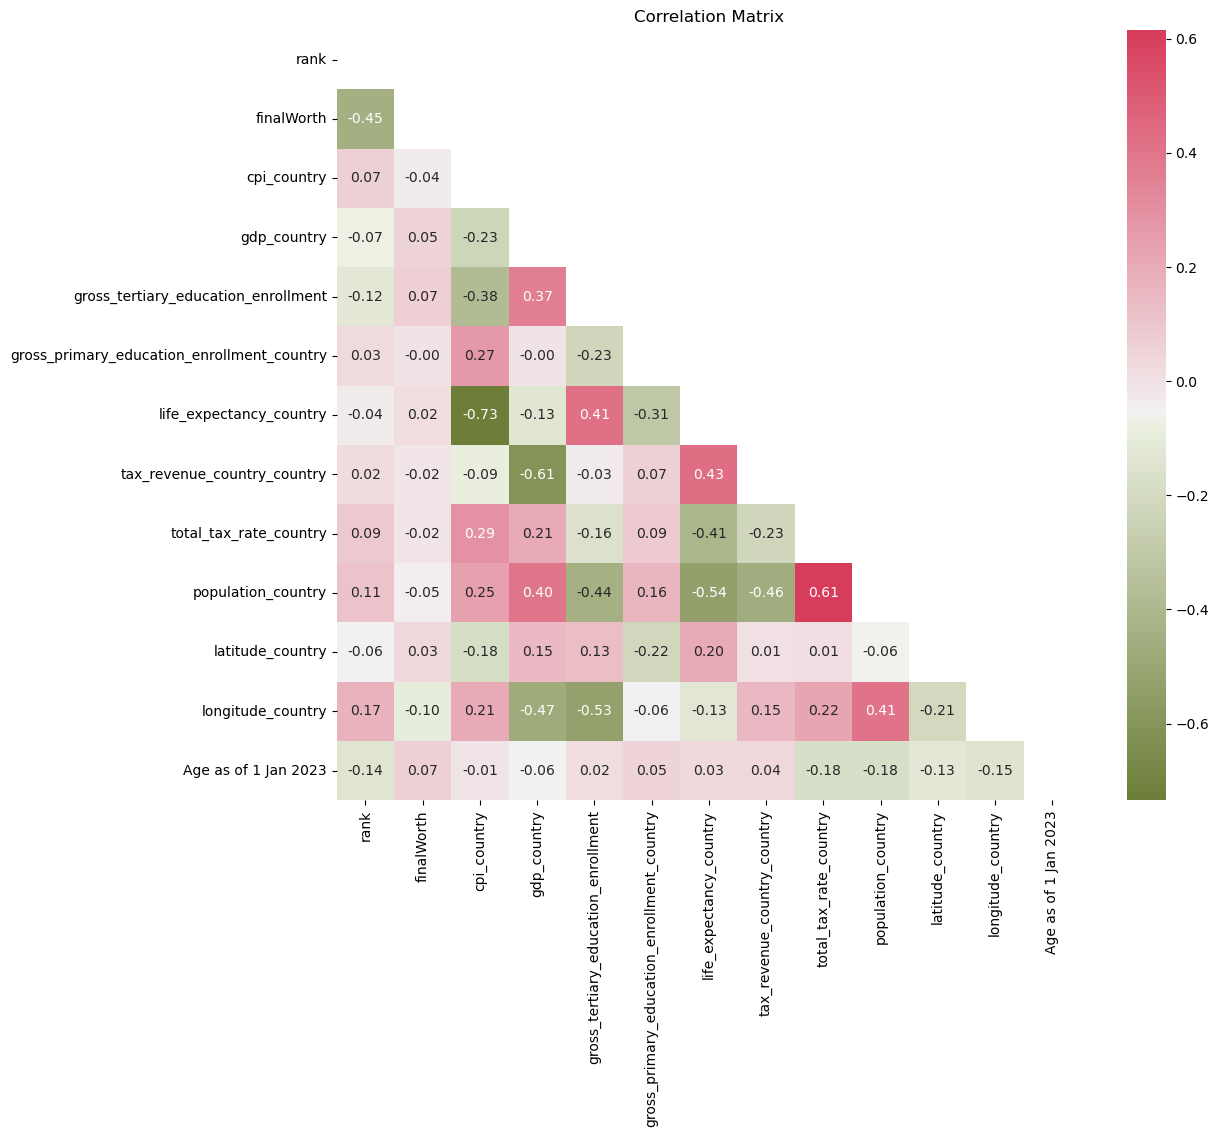

In [12]:
# Select only the numeric columns of the DataFrame
numeric_df = df.select_dtypes(include=[np.number])

# Calculate the correlation matrix
corr_matrix = numeric_df.corr()

initiate_array = np.zeros_like(corr_matrix)
initiate_array[np.triu_indices_from(initiate_array)] = True

# Display the correlation matrix using seaborn heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap=sns.diverging_palette(100, 5, as_cmap=True), annot=True, fmt=".2f", mask=initiate_array)

plt.title("Correlation Matrix")
plt.show()

The first EDA we have done is a correlation matrix. We have only used numeric items in the dataset. The highest positive correlation is population and total tax rate (0.61). The highest negative correlation is CPI and life expectancy. These highest positive and negative correlations are country-country correlations. When we look at the final worth, this should be correlated highly to rank, and yet the correlation is not very strong (0.45). To get more billionaire specific data I am going to use bar charts. 

## Bar Charts:

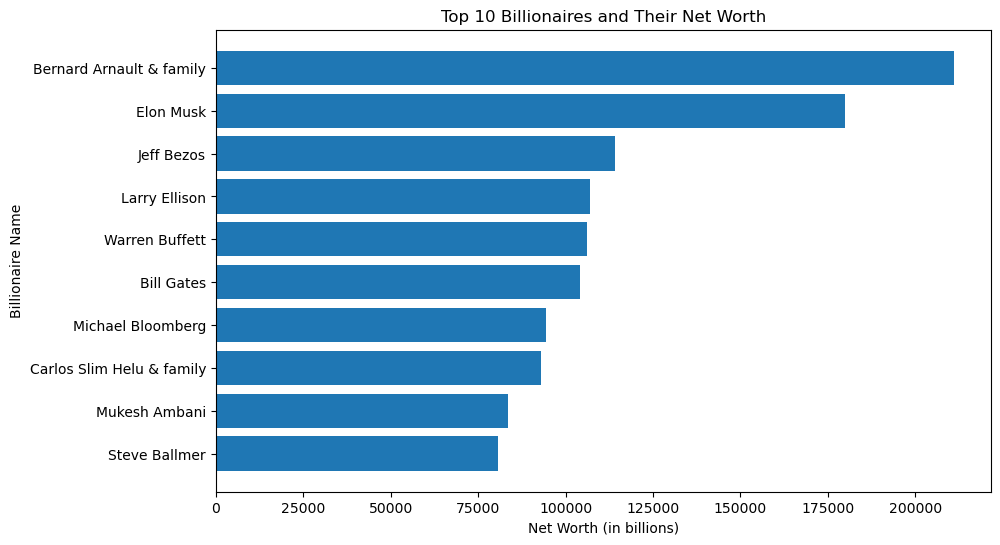

In [27]:
# Sort the DataFrame by 'finalWorth' in descending order and get the top 10
top_billionaires = df.sort_values(by='finalWorth', ascending=False).head(10)

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.barh(top_billionaires['personName'], top_billionaires['finalWorth'])
plt.xlabel('Net Worth (in billions)')
plt.ylabel('Billionaire Name')
plt.title('Top 10 Billionaires and Their Net Worth')
plt.gca().invert_yaxis()  # Invert y-axis to have the richest on top
plt.show()


Looking at the most simple bar chart we have the top ten billionaires and their net worth. At the top is Bernard Arnault and Family. In tenth is Steve Ballmer. 

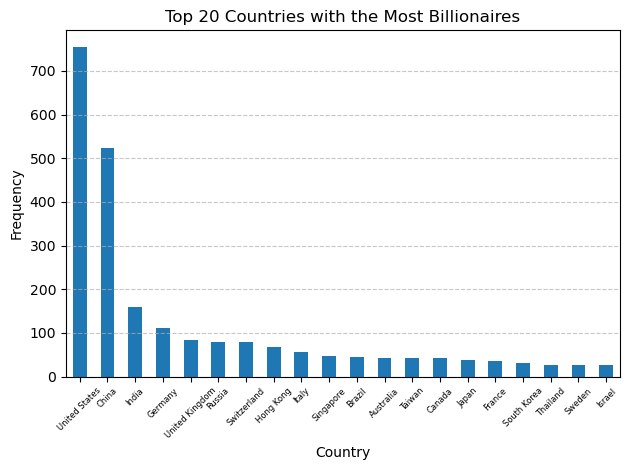

In [38]:
# Group the DataFrame by the frequency of entries per country
grouped = df.groupby('country').size().reset_index(name='frequency')

# Sort the DataFrame by frequency in descending order and take the top 20
top_20_grouped = grouped.sort_values(by='frequency', ascending=False).head(20)

# Create a bar plot
ax = top_20_grouped.plot(kind='bar', x='country', y='frequency', legend=False, rot=45)

# Add grid lines
ax.yaxis.grid(True, linestyle='--', alpha=0.7)

# Set labels and title
plt.xlabel('Country')
plt.ylabel('Frequency')
plt.title('Top 20 Countries with the Most Billionaires')

# Make the x-axis labels smaller
plt.xticks(fontsize=6)

# Show the plot
plt.tight_layout()
plt.show()

This bar chart looks at the number of billionaires per country (top 20). In first is the USA, with over 700 and in 20th is Israel. Since the US and China are so big in comparison to Sweden and Israel, I am going to look at the percentages of population. 

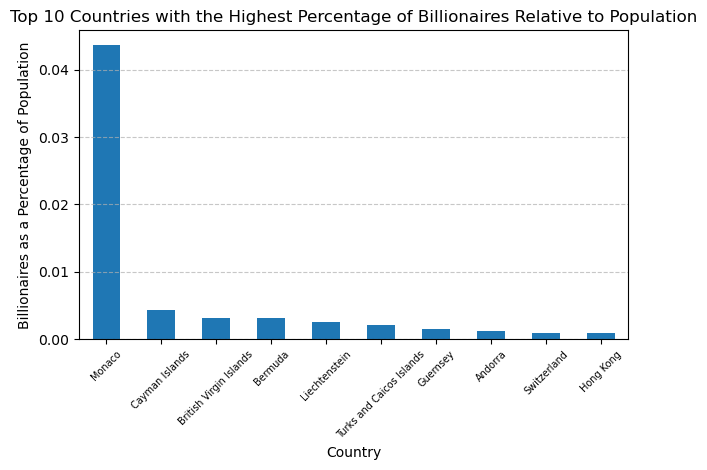

In [43]:
# Calculate the frequency of billionaires per country
grouped = df.groupby('country').size().reset_index(name='frequency')

# Calculate the population for each country (assuming population data is available in df)
population_data = df.groupby('country')['population_country'].mean().reset_index()

# Merge the frequency and population data on country
merged_df = pd.merge(grouped, population_data, on='country')

# Calculate billionaires per country as a percentage of the population
merged_df['billionaires_percentage'] = (merged_df['frequency'] / merged_df['population_country']) * 100

# Sort the DataFrame by the new percentage column in descending order and take the top 20
top_20_percentage = merged_df.sort_values(by='billionaires_percentage', ascending=False).head(10)

# Create a bar plot
ax = top_20_percentage.plot(kind='bar', x='country', y='billionaires_percentage', legend=False, rot=45)

# Add grid lines
ax.yaxis.grid(True, linestyle='--', alpha=0.7)

# Set labels and title
plt.xlabel('Country')
plt.ylabel('Billionaires as a Percentage of Population')
plt.title('Top 10 Countries with the Highest Percentage of Billionaires Relative to Population')

# Make the x-axis labels smaller
plt.xticks(fontsize=7)

# Show the plot
plt.tight_layout()
plt.show()


Monaco has by far the highest percentage of billionaires, at just over 0.04. The USA and China are now not even part of this top ten list. 

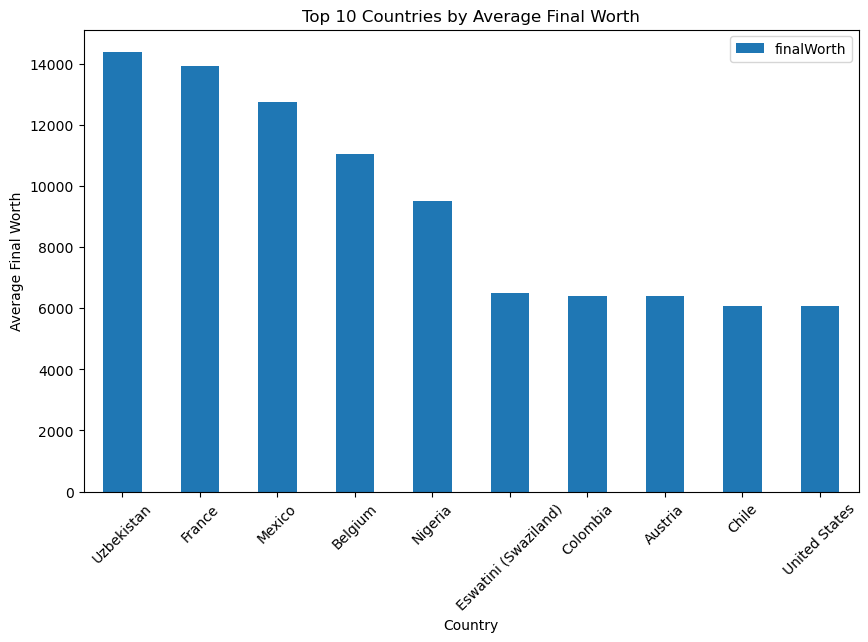

In [46]:
# Grouping by country and calculating the mean of finalWorth
average_finalWorth_per_country = df.groupby(['country'])[['finalWorth']].mean()

# Sorting and selecting the top 10 countries
top_ten_countries = average_finalWorth_per_country.sort_values(by='finalWorth', ascending=False).head(10)

# Creating a bar chart
top_ten_countries.plot(kind='bar', figsize=(10, 6))

# Adding title and labels
plt.title("Top 10 Countries by Average Final Worth")
plt.xlabel("Country")
plt.ylabel("Average Final Worth")
plt.xticks(rotation=45)  # Rotating x-axis labels for better readability

# Display the plot
plt.show()


We can also look at the countries with the richest billionaires... Uzebekistan has the richest billionaires with the average final worth being the highest here. 

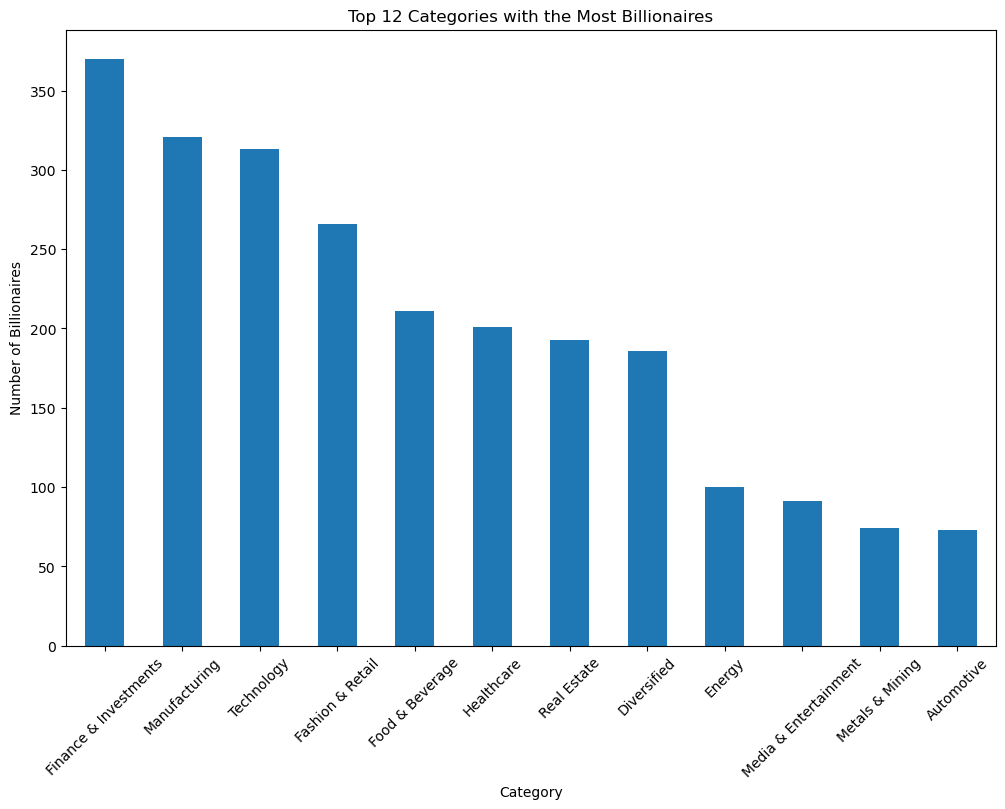

In [45]:
# Count the number of billionaires in each category
category_counts = df['category'].value_counts()

# Sort the counts and select the top 12 categories
top_categories = category_counts.head(12)

# Create a bar chart
plt.figure(figsize=(12, 8))
top_categories.plot(kind='bar')
plt.xlabel('Category')
plt.ylabel('Number of Billionaires')
plt.title('Top 12 Categories with the Most Billionaires')
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.show()

Looking at categories instead of countries we now see that the highest billionaire-industry is finance and investments. This has more than 350 billionaires. 

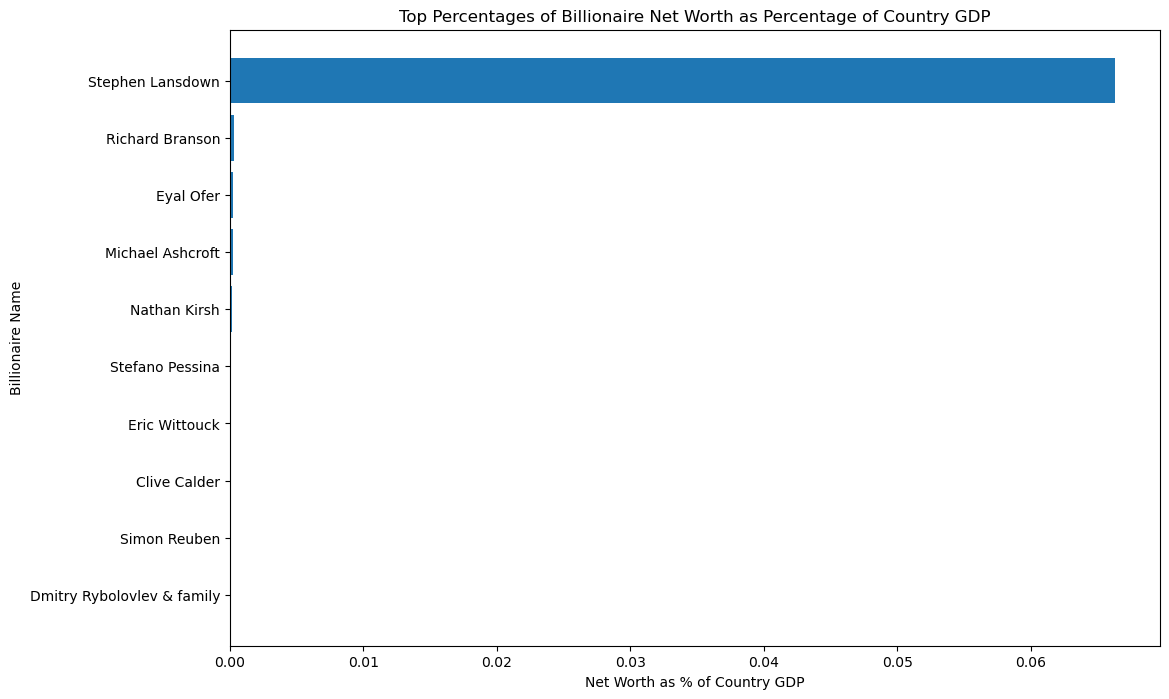

In [49]:
# Calculate net worth as a percentage of GDP for each billionaire
df['worth_percent_of_gdp'] = (df['finalWorth'] / df['gdp_country']) * 100

# Sort the DataFrame by 'worth_percent_of_gdp' in descending order and get the top entries
top_percentages = df.sort_values(by='worth_percent_of_gdp', ascending=False).head(10)

# Create a bar chart for these top percentages
plt.figure(figsize=(12, 8))
plt.barh(top_percentages['personName'], top_percentages['worth_percent_of_gdp'])

plt.xlabel('Net Worth as % of Country GDP')
plt.ylabel('Billionaire Name')
plt.title('Top Percentages of Billionaire Net Worth as Percentage of Country GDP')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest percentage on top

plt.show()


We can also look at the top billionaires in terms of net worth as a percentage of country GDP. We can look at the countries these individuals are from:

In [50]:
df[df['personName'] == 'Stephen Lansdown']

,rank,finalWorth,category,personName,country,city,source,industries,countryOfCitizenship,selfMade,...,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country,Age as of 1 Jan 2023,worth_percent_of_gdp
1331,1312,2300,Finance & Investments,Stephen Lansdown,Guernsey,St. Peter Port,Financial services,Finance & Investments,Guernsey,True,...,40.0,100.0,83.23,20.0,0.0,64600.0,49.465691,-2.585278,71,0.066359


## Pie Charts:

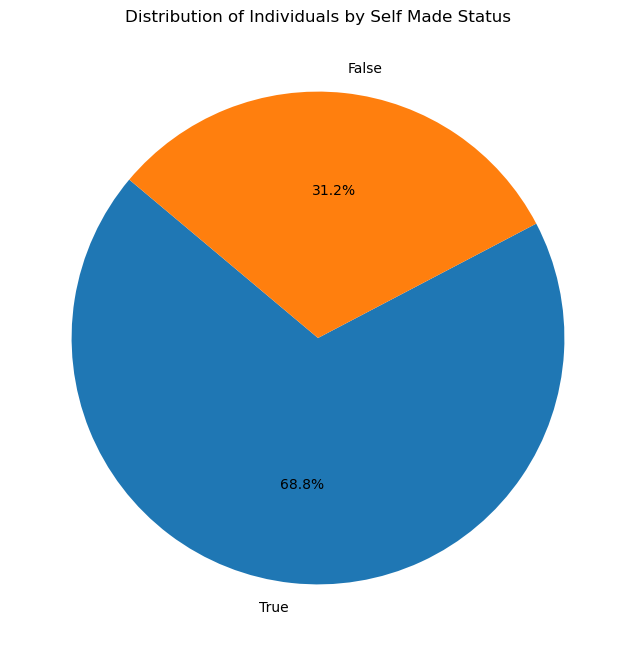

In [51]:
# Count the frequency of each category in 'selfMade'
self_made_counts = df['selfMade'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(self_made_counts, labels=self_made_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Individuals by Self Made Status')
plt.show()

We see that most billionaires are self made (almost 70%).

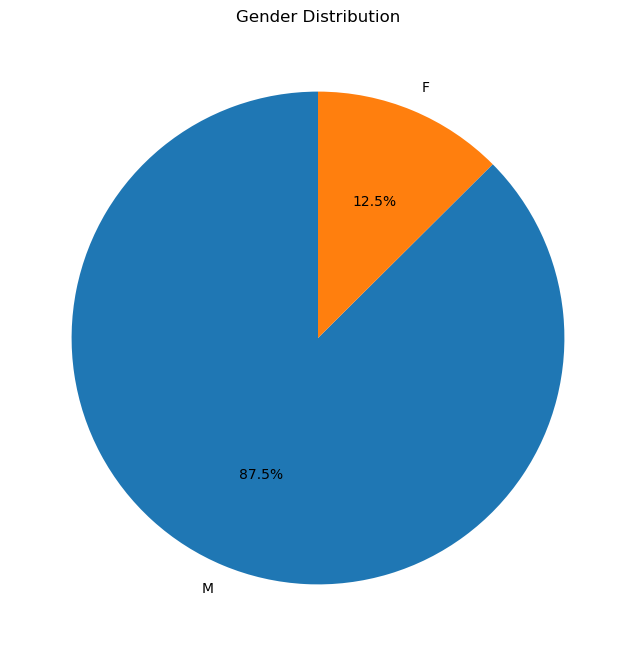

In [52]:
gender_counts = df["gender"].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Gender Distribution")
plt.show()

Most billionaires are male!

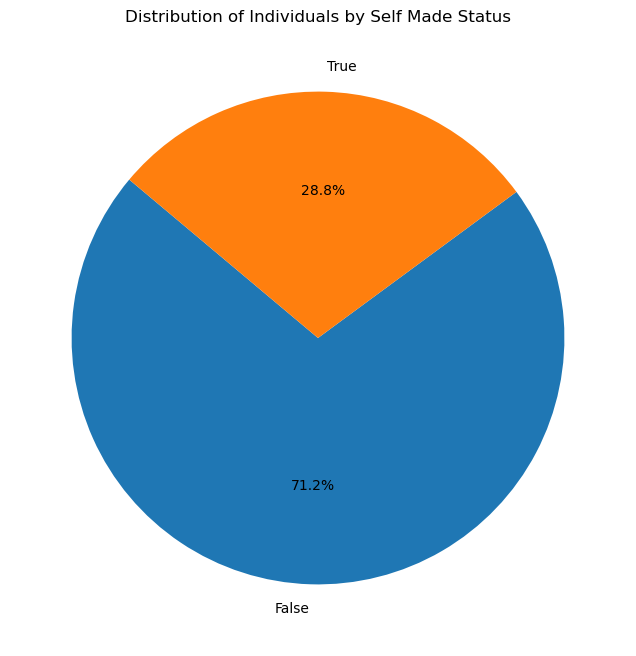

In [61]:
# Assuming 'df' is your DataFrame
# Filter the DataFrame to include only females
df_female = df[df['gender'] == 'F']
self_made_counts = df_female['selfMade'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(self_made_counts, labels=self_made_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Individuals by Self Made Status')
plt.show()

Most billionaire females are NOT self made.

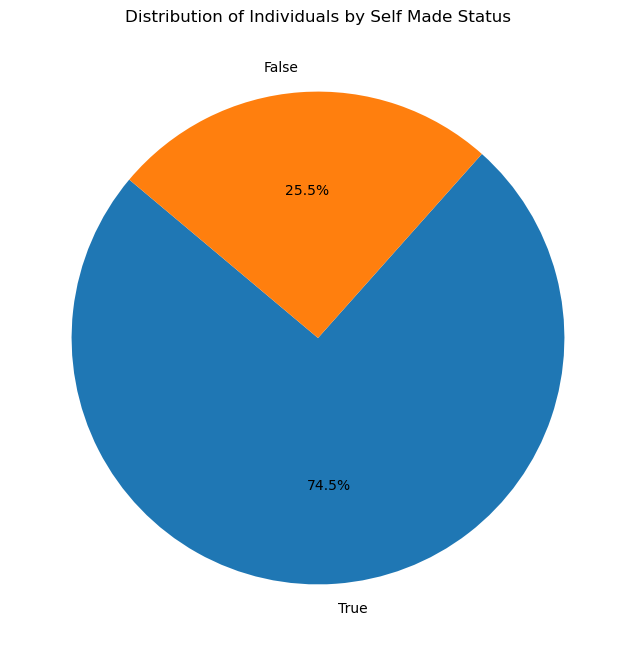

In [62]:
# Assuming 'df' is your DataFrame
# Filter the DataFrame to include only females
df_male = df[df['gender'] == 'M']
self_made_counts = df_male['selfMade'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(self_made_counts, labels=self_made_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Individuals by Self Made Status')
plt.show()

While most male billionaires are self made...

## Scatterplots:

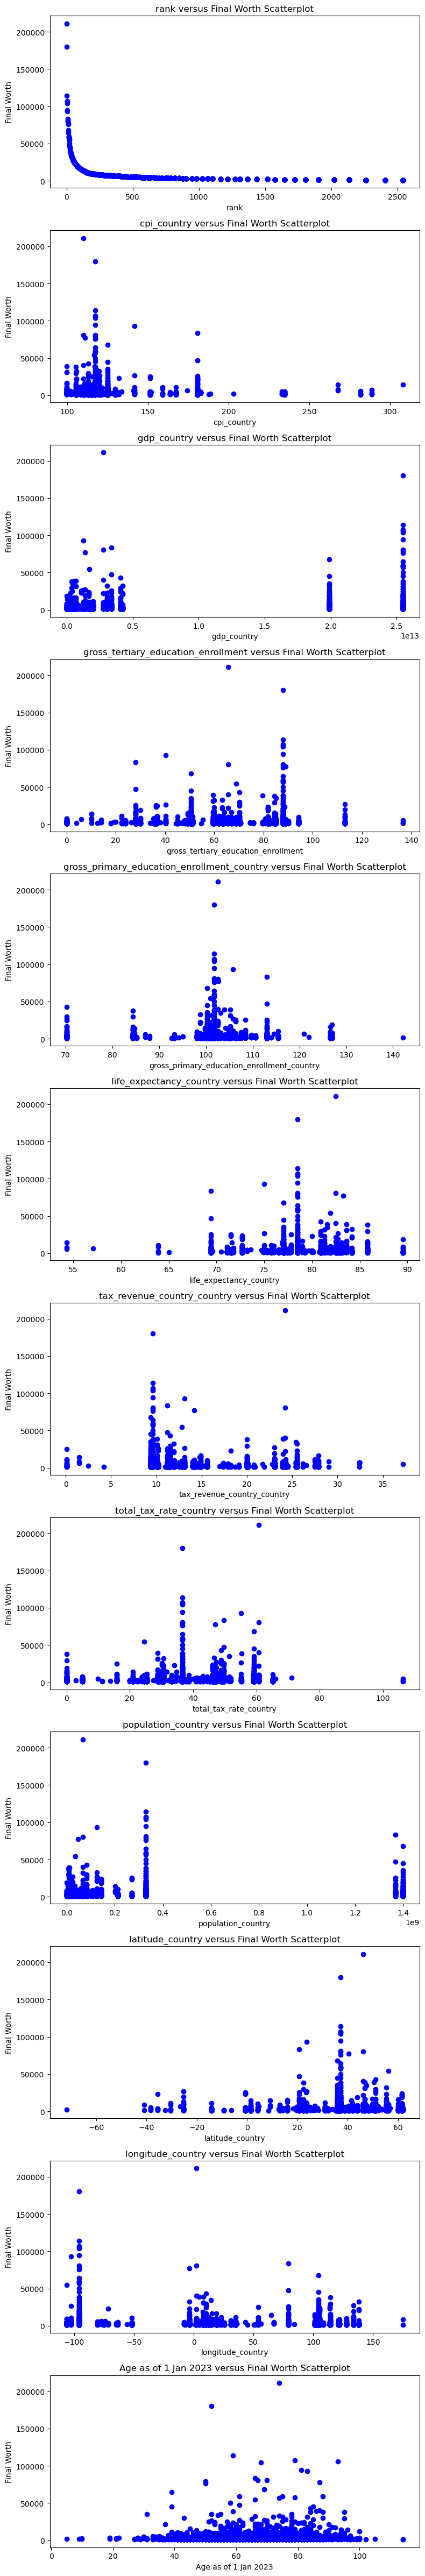

In [63]:
# Assuming your DataFrame is named 'df'
# List of all columns you're interested in
columns_of_interest = ['rank', 'finalWorth', 'category', 'personName', 'country', 'city',
                       'source', 'industries', 'countryOfCitizenship', 'selfMade', 'status',
                       'gender', 'birthDate', 'lastName', 'firstName', 'date', 'cpi_country',
                       'gdp_country', 'gross_tertiary_education_enrollment',
                       'gross_primary_education_enrollment_country', 'life_expectancy_country',
                       'tax_revenue_country_country', 'total_tax_rate_country',
                       'population_country', 'latitude_country', 'longitude_country',
                       'Age as of 1 Jan 2023']

# Drop non-numeric columns and the 'finalWorth' column
numeric_columns = df[columns_of_interest].select_dtypes(include='number').drop('finalWorth', axis=1).columns.tolist()

# Create the figure and subplots
num_plots = len(numeric_columns)
fig, axes = plt.subplots(nrows=num_plots, ncols=1, figsize=(8, 4 * num_plots))

# Loop through each numeric column and create the scatter plot
for i, column in enumerate(numeric_columns):
    axes[i].scatter(df[column], df['finalWorth'], color='blue', marker='o')
    
    # Add labels and title for each subplot
    axes[i].set_xlabel(column)
    axes[i].set_ylabel("Final Worth")
    axes[i].set_title(f"{column} versus Final Worth Scatterplot")

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

## Histograms:

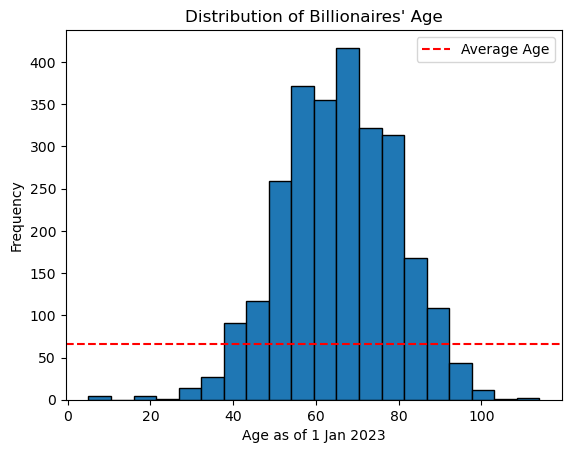

In [65]:
# Calculate the average age of billionaires
average_age = np.mean(df['Age as of 1 Jan 2023'])

# Plot the average age as a horizontal line
plt.axhline(average_age, color='red', linestyle='--', label='Average Age')

# Plot the histogram of billionaires' age
plt.hist(df['Age as of 1 Jan 2023'], bins=20, edgecolor='black')
plt.xlabel('Age as of 1 Jan 2023')
plt.ylabel('Frequency')
plt.title('Distribution of Billionaires\' Age')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


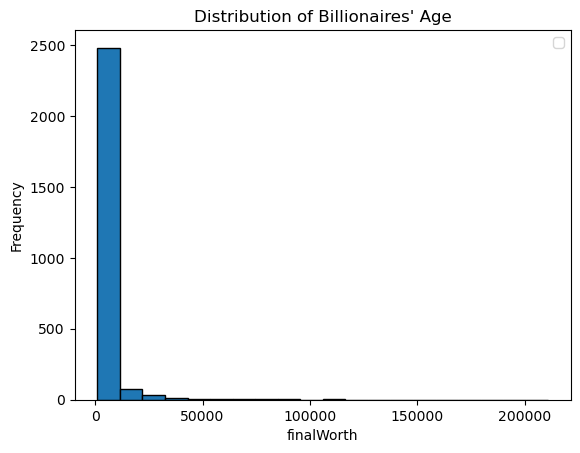

In [72]:
plt.hist(df['finalWorth'], bins=20, edgecolor='black')
plt.xlabel('finalWorth')
plt.ylabel('Frequency')
plt.title('Distribution of Billionaires\' Age')
plt.legend()
plt.show()

In [64]:
average_finalWorth_per_country = df.groupby(['country'])[['finalWorth']].mean()
average_finalWorth_per_country

,finalWorth
country,
Algeria,4600.000000
Andorra,1500.000000
Argentina,2750.000000
Armenia,1200.000000
Australia,4034.883721
...,...
United Kingdom,4515.476190
United States,6062.251656
Uruguay,1800.000000
